<a href="https://colab.research.google.com/github/carlos-jaramillo/DataScienceProyect/blob/main/Proyect_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desarrollado por: *Martín Jaramillo*

* Fecha de creación: 18/03/2023
* Fecha de actualización: 8/04/2023

### Descripción.
 1.  Fuente de datos:

Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

2. Breve descripción:

Mediciones sobre la calidad de aire, observando cantidad de material particulado 2.5 durante años, meses, días y horas.

3. Objetivo del proyecto:

Predecir futuras mediciones de Material particulado durante el tiempo de un año, con el resto de características.

4. Tipo de modelo:

Regresión

5. Características (#):

13

6. Filas (#):

43824




# Attribute Information:

* No: row number

* year: year of data in this row

* month: month of data in this row

* day: day of data in this row

* hour: hour of data in this row

* pm2.5: PM2.5 concentration (ug/m^3)

* DEWP: Dew Point (â„ƒ)

* TEMP: Temperature (â„ƒ)

* PRES: Pressure (hPa)

* cbwd: Combined wind direction

* Iws: Cumulated wind speed (m/s)

* Is: Cumulated hours of snow

* Ir: Cumulated hours of rain

In [2]:
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#Dataframe
df = pd.read_csv("/content/drive/MyDrive/PRSA_data_2010.1.1-2014.12.31.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
#Looking the info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
#Checking duplicates
df.duplicated().sum()

0

In [7]:
#Identify any NaN values
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [8]:
#Percentage of null values
print((2067/43824)*100)

4.716593647316539


In [9]:
#Cheking more info on "pm2.5" column
df["pm2.5"].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

In [10]:
#Cheking more info on "pm2.5" column
df["pm2.5"].value_counts()

16.0     626
11.0     596
13.0     589
12.0     578
17.0     572
        ... 
558.0      1
607.0      1
491.0      1
524.0      1
580.0      1
Name: pm2.5, Length: 581, dtype: int64

In [11]:
#Cheking more info on "pm2.5" column
df["pm2.5"].unique()

array([ nan, 129., 148., 159., 181., 138., 109., 105., 124., 120., 132.,
       140., 152., 164., 158., 154., 170., 149., 156., 126.,  90.,  63.,
        65.,  55.,  83.,  91.,  86.,  82.,  78.,  98., 107.,  96.,  95.,
        70.,  61.,  53.,  71.,  72.,  76.,  73.,  79.,  58.,  25.,  26.,
        28.,  20.,  29.,  27.,  32.,  30.,  31.,  33.,  34.,  36.,  39.,
        41.,  50.,  56.,  59.,  60.,  84., 106.,  66.,  77.,  44.,  21.,
        42.,  48.,  49.,  52.,  75.,  93., 131., 127., 130.,  43.,  37.,
        24.,  23.,  40.,  51.,  57.,  54.,  67., 198., 190., 210., 195.,
       275., 110., 100.,  81.,  92., 135., 155., 250., 200., 231., 212.,
       219., 227., 226., 225., 168., 169., 165., 167., 196., 119.,  45.,
        47.,  62.,  35.,  68.,  88.,  22.,  17.,  16.,  18.,  15.,  13.,
         9.,  11.,  19.,  12., 257., 174., 161., 137.,  64.,  87.,  89.,
        94.,  69., 102., 141., 211., 242., 271., 249., 147., 114., 108.,
       128., 150., 197., 235., 261., 269., 266., 26

In [12]:
counts = df["pm2.5"].value_counts()
table = pd.DataFrame({'Value': counts.index, 'Count': counts.values})
print(table)

     Value  Count
0     16.0    626
1     11.0    596
2     13.0    589
3     12.0    578
4     17.0    572
..     ...    ...
576  558.0      1
577  607.0      1
578  491.0      1
579  524.0      1
580  580.0      1

[581 rows x 2 columns]


In [13]:
#Checking atypical values on pm2.5 column
df.loc[df["pm2.5"] == 0]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24034,24035,2012,9,28,10,0.0,-5,20.0,1020.0,NW,139.48,0,0
24039,24040,2012,9,28,15,0.0,-10,24.0,1017.0,NW,192.68,0,0


In [14]:
#Checking atypical values on pm2.5 column
df.loc[df["pm2.5"] == 1]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
6315,6316,2010,9,21,3,1.0,13,14.0,1015.0,NE,48.73,0,9
21402,21403,2012,6,10,18,1.0,-2,29.0,999.0,NW,24.15,0,0
24040,24041,2012,9,28,16,1.0,-9,23.0,1016.0,NW,204.75,0,0
24041,24042,2012,9,28,17,1.0,-8,23.0,1016.0,NW,213.69,0,0
24075,24076,2012,9,30,3,1.0,6,9.0,1018.0,NW,3.13,0,0


In [15]:
#Checking atypical values on pm2.5 column
df.loc[df["pm2.5"] == 2]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
4476,4477,2010,7,6,12,2.0,5,38.0,1001.0,cv,3.58,0,0
6800,6801,2010,10,11,8,2.0,8,14.0,1017.0,NE,3.13,0,0
6870,6871,2010,10,14,6,2.0,1,9.0,1020.0,NW,9.84,0,0
9437,9438,2011,1,29,5,2.0,-25,-11.0,1036.0,NW,117.13,0,0
14261,14262,2011,8,18,5,2.0,19,20.0,1010.0,cv,1.78,0,0
21401,21402,2012,6,10,17,2.0,-2,29.0,999.0,NW,21.02,0,0
24027,24028,2012,9,28,3,2.0,1,16.0,1018.0,NW,69.29,0,0
24030,24031,2012,9,28,6,2.0,-1,15.0,1019.0,NW,96.11,0,0
24031,24032,2012,9,28,7,2.0,-3,16.0,1019.0,NW,107.29,0,0
24038,24039,2012,9,28,14,2.0,-8,24.0,1017.0,NW,181.50,0,0


In [16]:
#Decided not to eliminate these measurements, since I see the average and the info of the describe() method, don't see anything out of the ordinary, comparing it with measurements from another city.
#for more check this url, this are the measurements form Quito.
#url:http://www.quitoambiente.gob.ec/images/Secretaria_Ambiente/red_monitoreo/informacion/Informe_Calidad_Aire_2018.pdf . Pages: 29

In [17]:
#Addressing NaN values
df["pm2.5"].interpolate(method="linear", inplace=True)

In [18]:
#Looking if there are any NaN values left
df.isna().sum()

No        0
year      0
month     0
day       0
hour      0
pm2.5    24
DEWP      0
TEMP      0
PRES      0
cbwd      0
Iws       0
Is        0
Ir        0
dtype: int64

In [19]:
#Looking if there are any NaN values left
df["pm2.5"].isna

<bound method Series.isna of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
43819     8.0
43820    10.0
43821    10.0
43822     8.0
43823    12.0
Name: pm2.5, Length: 43824, dtype: float64>

In [20]:
#Dropping those NaN values left
df.dropna(subset=["pm2.5"], inplace=True)
df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [21]:
#Drop those 24 values, cause they represent the values from one day, so, it is not that much difference.

In [22]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [23]:
#Identifying outliers
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,21924.500000,2012.001096,6.526575,15.735890,11.500000,98.244966,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,12644.115232,1.413454,3.447092,8.795077,6.922266,90.966982,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10974.750000,2011.000000,4.000000,8.000000,5.750000,30.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21924.500000,2012.000000,7.000000,16.000000,11.500000,73.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32874.250000,2013.000000,10.000000,23.000000,17.250000,136.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [24]:
#Looking for all the years of the DataFrame
df["year"].unique()

array([2010, 2011, 2012, 2013, 2014])

In [25]:
#Checking inconsistencies on categorical values
df["cbwd"].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [26]:
#Changing "cv" for "SW" on this categorical column
df["cbwd"]=df["cbwd"].replace('cv', 'SW')
df["cbwd"].unique()

array(['SE', 'SW', 'NW', 'NE'], dtype=object)

In [27]:
#Dropping columns
df = df.drop(columns=["No","DEWP","cbwd","Is","Ir"])
df.head()

,year,month,day,hour,pm2.5,TEMP,PRES,Iws
24,2010,1,2,0,129.0,-4.0,1020.0,1.79
25,2010,1,2,1,148.0,-4.0,1020.0,2.68
26,2010,1,2,2,159.0,-5.0,1021.0,3.57
27,2010,1,2,3,181.0,-5.0,1022.0,5.36
28,2010,1,2,4,138.0,-5.0,1022.0,6.25


In [28]:
#Correlation
corr = df.corr()

In [29]:
#Import
import seaborn as sns

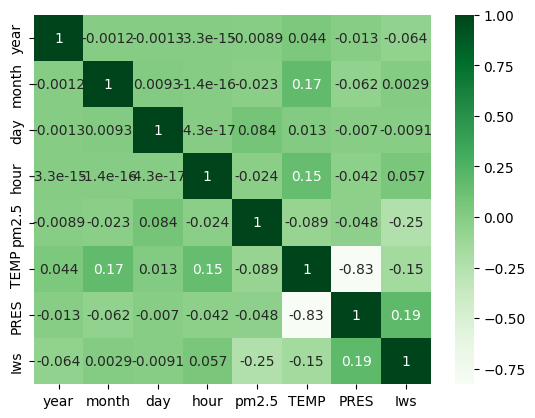

In [30]:
#Heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True);

In [31]:
#Univariate visuals for some characteristics.

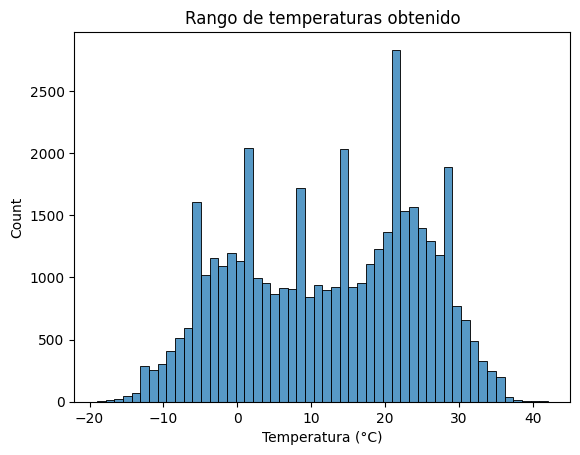

In [32]:
#Histogram of the temperature
sns.histplot(data=df, x="TEMP")
plt.title("Rango de temperaturas obtenido")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Count");

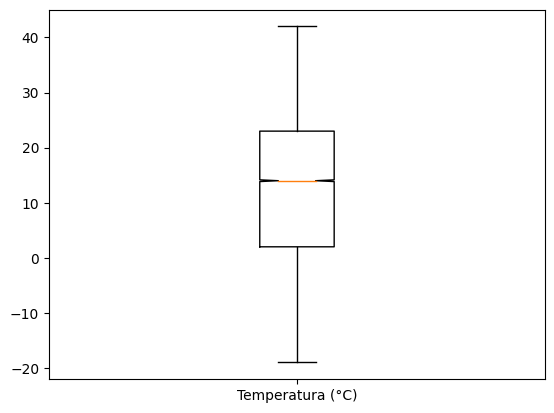

In [33]:
#Boxplot of the temperature
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot(df["TEMP"], notch = True, labels=["Temperatura (°C)"]);

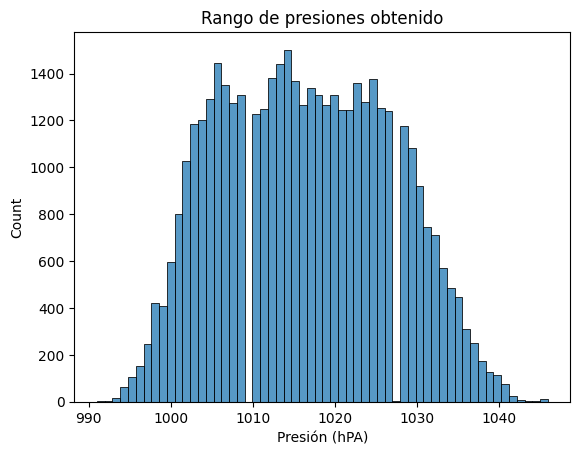

In [34]:
#Histogram of the pressure
sns.histplot(data=df, x="PRES")
plt.title("Rango de presiones obtenido")
plt.xlabel("Presión (hPA)")
plt.ylabel("Count");

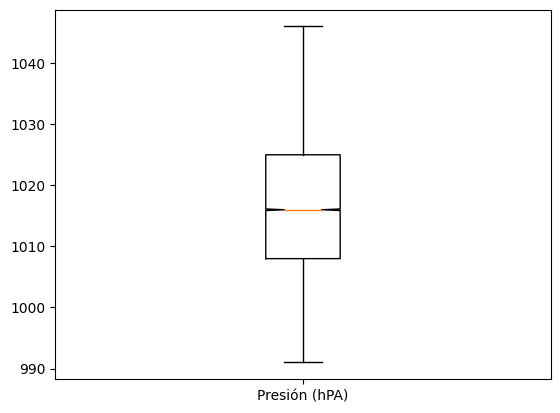

In [35]:
#Boxplot of the pressure
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot(df["PRES"], notch = True, labels=["Presión (hPA)"]);

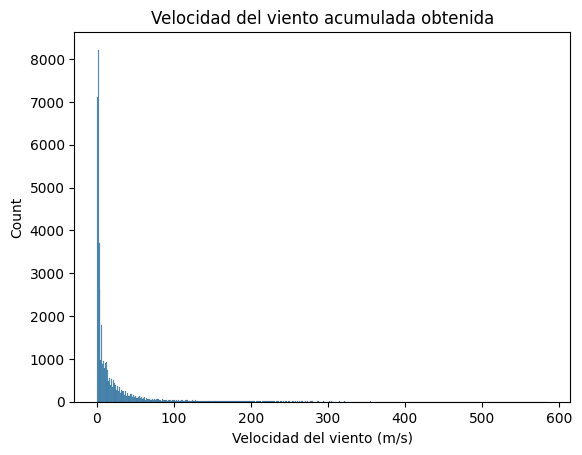

In [36]:
#Histogram of the Cumulated wind speed
sns.histplot(data=df, x="Iws")
plt.title("Velocidad del viento acumulada obtenida")
plt.xlabel("Velocidad del viento (m/s)")
plt.ylabel("Count");

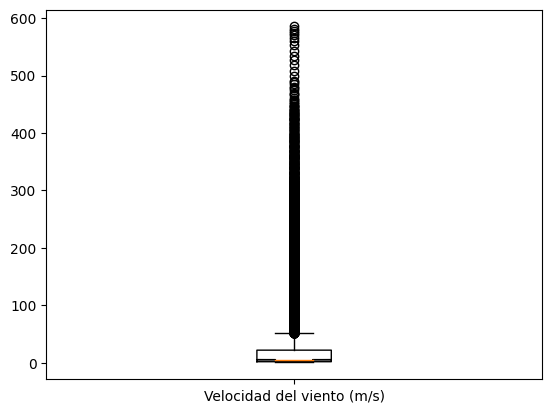

In [37]:
#Boxplot of the Cumulated wind speed
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot(df["Iws"], notch = True, labels=["Velocidad del viento (m/s)"]);

In [38]:
#Intentar hacer predicciones con la ciudad de Quito.
#O simular las situaciones de que pasaría si erupciona el Cotopaxi.

In [39]:
#Voy a usar diferentes dataframes, así que guardaré la información original.
df1=df
df2=df
df3=df
df4=df

In [40]:
#@title Instanciación de diversos modelos, para escoger el idóneo.

#Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
#@title Modelo: Regresión Linear
#Train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(df1.drop('pm2.5', axis=1), df1['pm2.5'], test_size=0.2)

In [42]:
# #Instanciación de modelo: Regresión linear
lr_model = LinearRegression()

In [43]:
#Model fit
lr_model.fit(X1_train, y1_train)

LinearRegression()

In [44]:
# Predicciones
y_pred_lr = lr_model.predict(X1_test)

In [45]:
# Evaluación del rendimiento del modelo con Error Cuadrático Medio y R2
mse_lr = mean_squared_error(y1_test, y_pred_lr)
r2_lr = r2_score(y1_test, y_pred_lr)

In [46]:
#Resultados MSE y R2
print(mse_lr)
print(r2_lr)

7285.199794910162
0.11888723506344367


¿Por qué no usar este modelo?

Dentro de lo que estuve investigando y por lo que he usado, el modelo de regresión linear no va a funcionar de forma correcta con modelos de regresión durante tiempo.

In [100]:
#@title Modelo: KNN
#Train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(df2.drop('pm2.5', axis=1), df2['pm2.5'], test_size=0.2)

In [95]:
#Instanciación de modelo: KNN
knn_model = KNeighborsRegressor(n_neighbors=3, leaf_size=30)

In [96]:
#Model fit
knn_model.fit(X2_train, y2_train)

KNeighborsRegressor(n_neighbors=3)

In [97]:
# Predicciones
y_pred_knn = knn_model.predict(X2_test)

In [98]:
# Evaluación del rendimiento del modelo con Error Cuadrático Medio y R2
mse_knn = mean_squared_error(y2_test, y_pred_knn)
r2_knn = r2_score(y2_test, y_pred_knn)

In [99]:
#Resultados MSE y R2
print(mse_knn)
print(r2_knn)

3492.9503195943544
0.5541559718627302


¿Por qué no usar este modelo?

Intenté ajustar algunos parámetros, y ver si podía mejorar el coeficiente de determinación (R2) pero no subió más de 0.55, así que lo deseché.

In [53]:
#@title Modelo: Bosque Aleatorio
#Train/test split
X3_train, X3_test, y3_train, y3_test = train_test_split(df3.drop('pm2.5', axis=1), df3['pm2.5'], test_size=0.2)

In [54]:
#Instanciación de modelo: Bosque Aleatorio
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)

In [55]:
#Model fit
rf_model.fit(X3_train, y3_train)

RandomForestRegressor(max_depth=5)

In [56]:
# Predicciones
y_pred_rf = rf_model.predict(X3_test)

In [57]:
# Evaluación del rendimiento del modelo con Error Cuadrático Medio y R2
mse_rf = mean_squared_error(y3_test, y_pred_rf)
r2_rf = r2_score(y3_test, y_pred_rf)

In [58]:
#Resultados MSE y R2
print(mse_rf)
print(r2_rf)

6343.840750408885
0.24765644305623458


¿Por qué no usar este modelo?

No uso el Bosque Aleatorio, por que hice varias pruebas con los estimators, y las predicciones, pero de igual forma no sube mucho el coeficiente de determinación.

In [59]:
#@title Modelo: Gradient Boosting
#Train/test split
X4_train, X4_test, y4_train, y4_test = train_test_split(df4.drop('pm2.5', axis=1), df4['pm2.5'], test_size=0.2)

In [121]:
#Instanciación de modelo: Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=9000, max_depth=30,min_samples_split= 5, learning_rate= 0.01)

In [122]:
#Model fit
gb_model.fit(X4_train, y4_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=30, min_samples_split=5,
                          n_estimators=9000)

In [123]:
# Predicciones
y_pred_gb = gb_model.predict(X4_test)

In [124]:
# Evaluación del rendimiento del modelo con Error Cuadrático Medio y R2
mse_gb = mean_squared_error(y4_test, y_pred_gb)
r2_gb = r2_score(y4_test, y_pred_gb)

In [125]:
#Resultados MSE y R2
print(mse_gb)
print(r2_gb)

1824.7206563186994
0.786528163715788


Este modelo personalmente lo investigué, para tener más información del mismo, entrar a esta página: https://vitalflux.com/gradient-boosting-regression-python-examples/


In [65]:
#@title Modelo:SARIMAX
#Uso de ingieniería de caracteristicas: fecha y hora
#Esto me permitirá trabajar más facilmente y tomar ventaja de

In [66]:
# combinar el año, mes, día, y horas en una sola columna
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
# Eliminar las columnas originales, por que ya son redundantes
df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df.head()

,pm2.5,TEMP,PRES,Iws,datetime
24,129.0,-4.0,1020.0,1.79,2010-01-02 00:00:00
25,148.0,-4.0,1020.0,2.68,2010-01-02 01:00:00
26,159.0,-5.0,1021.0,3.57,2010-01-02 02:00:00
27,181.0,-5.0,1022.0,5.36,2010-01-02 03:00:00
28,138.0,-5.0,1022.0,6.25,2010-01-02 04:00:00


In [67]:
#Hay que instalar esta extensión para poder usar de statsmodels el modelo: SARIMAX
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
import statsmodels.api as sm

In [70]:
#Hago un groupby para ver el promedio del contaminante con el pasar del tiempo
df_hourly = df.groupby('datetime')['pm2.5'].mean()

In [79]:
#Instancia de modelo, los parámetros hacen que vaya de hora en hora.
model = sm.tsa.statespace.SARIMAX(df_hourly, order=(1, 0, 0), seasonal_order=(0, 1, 0, 24))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [73]:
#Predicciones
preds = model_fit.predict(start=df_hourly.index[-1], end=df_hourly.index[-1] + pd.Timedelta(hours=24), dynamic=True, params=model_fit.params)

In [76]:
preds.head()

2014-12-31 23:00:00    16.0
2015-01-01 00:00:00    10.0
2015-01-01 01:00:00    11.0
2015-01-01 02:00:00    20.0
2015-01-01 03:00:00     9.0
Freq: H, Name: predicted_mean, dtype: float64

In [80]:
#Hacer un Series de las predicciones
preds_series = pd.Series(preds, index=pd.date_range(start=df_hourly.index[-1], periods=len(preds), freq='H'))

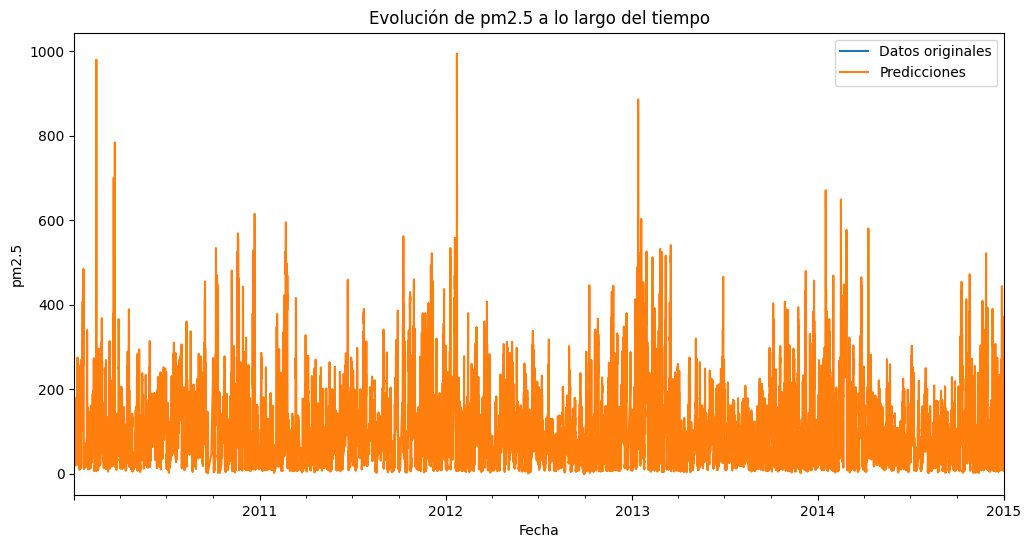

In [83]:
#Gráfico de predicciones vs Datos originales.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
# Gráfico de línea con los datos originales
preds_series.plot(ax=ax)
# Gráfico de línea con las predicciones
df_hourly.plot(ax=ax)
# Etiquetas del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('pm2.5')
ax.set_title('Evolución de pm2.5 a lo largo del tiempo')
ax.legend(['Datos originales', 'Predicciones']);

Este modelo lo investigué yo, para más información del mismo: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/
https://www.statsmodels.org/devel/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

Estoy viendo si usar este, o el modelo de Gradient Boosting, el problema de Gradient Boosting, aunque es el mejor con un resultado de 0.78 en R2, se demora mucho, ya que necesita mucho input y varios parámetros, para que mejore, mientras que en el SARIMAX con toda la info, usando el tiempo, puedo predecir, lo malo, es que aún no lo he investigado muy bien, me gustaría investigar algo más y ver si añadiendo más datos, puedo ver si logra predecir algo, ya que ahora predice exactamente lo mismo que los datos originales.